In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_excel("Gold.xlsx")
df=pd.DataFrame(data)
df.head()

,Year,Gold Price (10g),Rate of Change (%),Imports value,Exports Value,Imports Percentage (%),Exports Percentage (%),Growth Rate (Gold Exports),GDP,GOLD RESERVES (IN CRORE),Exchange Rate(USD-INR),CPI Inflation Rate (%),Repo Rate (%),Unemployment Rate (%)
0,1999,4234.0,1.92,3180500,636100,0.90,0.0017,-,6.2,12559,43.060000,4.67,8.00,5.4
1,2000,4400.0,3.92,3300000,660000,0.91,0.0022,0.0375,4.0,12973,44.948154,4.01,9.00,5.6
2,2001,4300.0,-2.27,3450000,690000,0.92,0.0026,0.0455,5.2,12711,47.172949,3.78,8.75,5.8
3,2002,4990.0,16.05,3600000,720000,0.92,0.0025,0.0435,5.4,14868,48.575595,4.30,5.75,5.9
4,2003,5600.0,12.22,4200000,840000,0.92,0.0025,0.1667,4.0,16785,46.538938,3.81,5.00,5.6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        25 non-null     int64  
 1   Gold Price (10g)            25 non-null     float64
 2   Rate of Change (%)          25 non-null     float64
 3   Imports value               25 non-null     int64  
 4   Exports Value               25 non-null     int64  
 5   Imports Percentage (%)      25 non-null     float64
 6   Exports Percentage (%)      25 non-null     float64
 7   Growth Rate (Gold Exports)  25 non-null     object 
 8   GDP                         25 non-null     float64
 9   GOLD RESERVES (IN CRORE)    25 non-null     int64  
 10  Exchange Rate(USD-INR)      25 non-null     float64
 11  CPI Inflation Rate (%)      25 non-null     float64
 12  Repo Rate (%)               25 non-null     float64
 13  Unemployment Rate (%)       25 non-nu

In [5]:
# Define features and target
features = [
    'Imports value', 'Exports Value', 'Imports Percentage (%)',
    'Exports Percentage (%)', 'GDP', 'GOLD RESERVES (IN CRORE)', 'CPI Inflation Rate (%)',
    'Repo Rate (%)', 'Unemployment Rate (%)'
]

target = 'Gold Price (10g)'

In [6]:
# Drop rows with missing values
df = df.dropna()


In [7]:
# Split data into features (X) and target (y)
X = df[features]
y = df[target]


In [8]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor()
}


In [10]:
# Train and evaluate models
results = []
model_predictions = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    model_predictions[name] = y_pred
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        "Model": name,
        "MSE": mse,
        "RMSE": rmse,
        "R^2": r2
    })

In [11]:

# Display results
results_df = pd.DataFrame(results)
print(results_df)


                      Model           MSE          RMSE       R^2
0         Linear Regression  5.775852e+07   7599.902788  0.789940
1             Decision Tree  1.015083e+08  10075.133468  0.630828
2             Random Forest  1.345701e+07   3668.379604  0.951059
3         Gradient Boosting  5.805586e+07   7619.439934  0.788859
4  Support Vector Regressor  2.799339e+08  16731.224509 -0.018082
5       K-Nearest Neighbors  8.276805e+06   2876.943750  0.969898


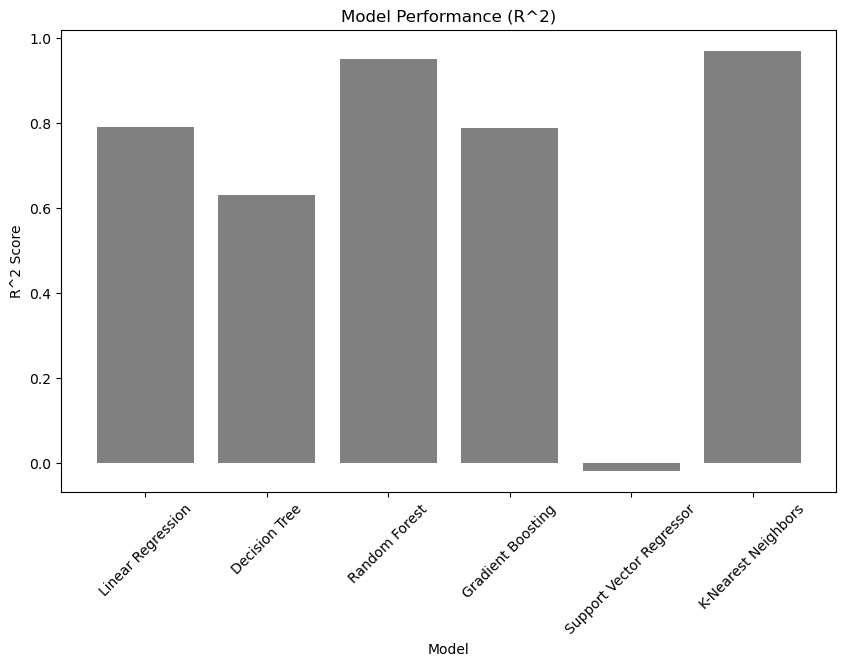

In [16]:
 
# Visualize R^2 Scores
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['R^2'], color='grey')
plt.title('Model Performance (R^2)')
plt.ylabel('R^2 Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()


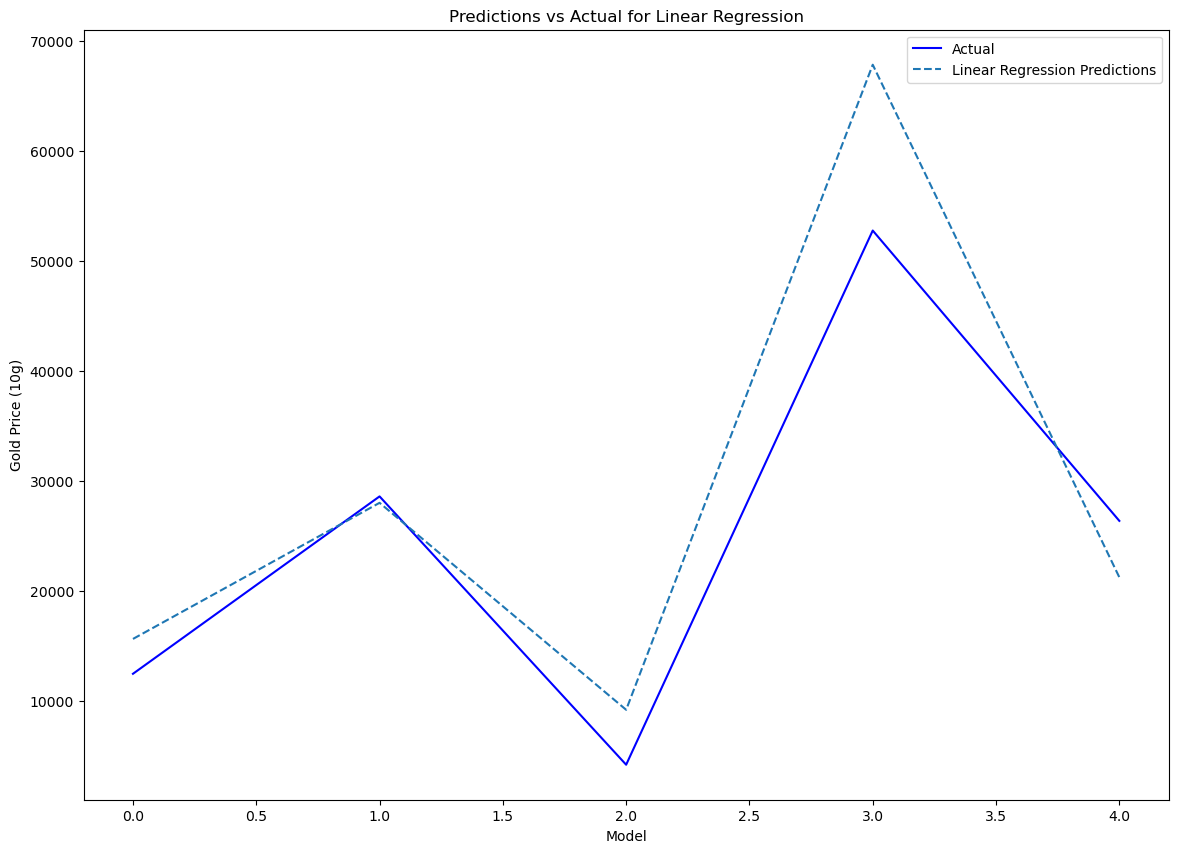

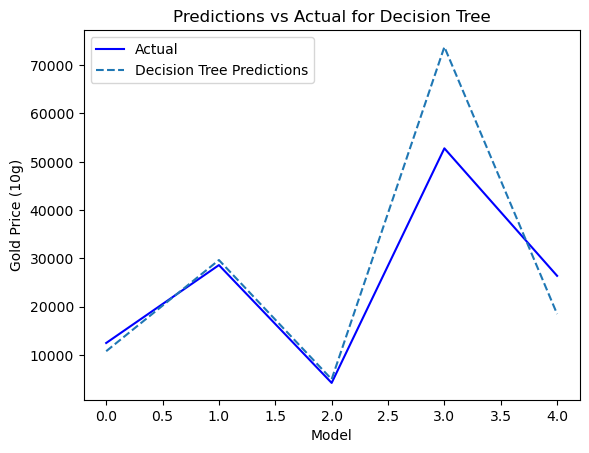

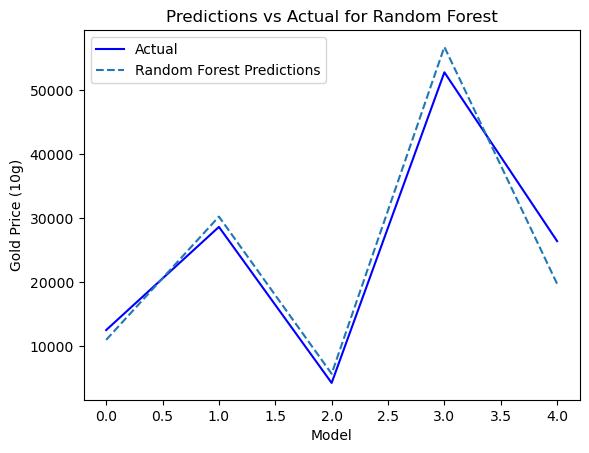

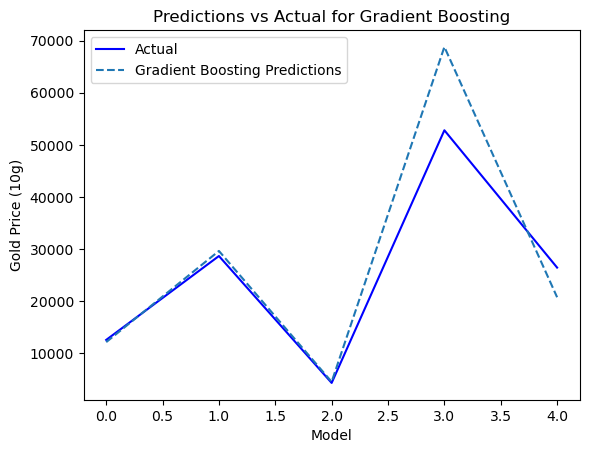

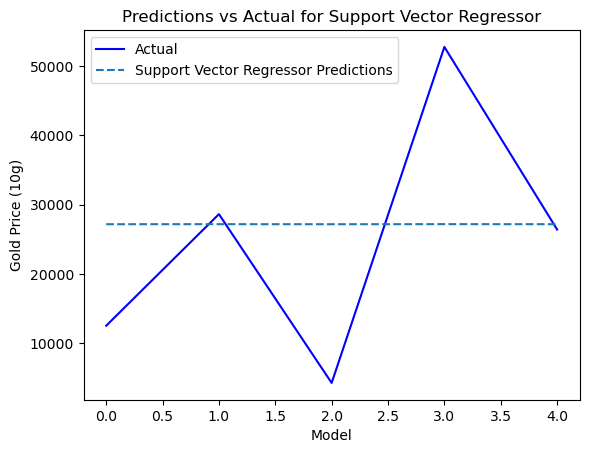

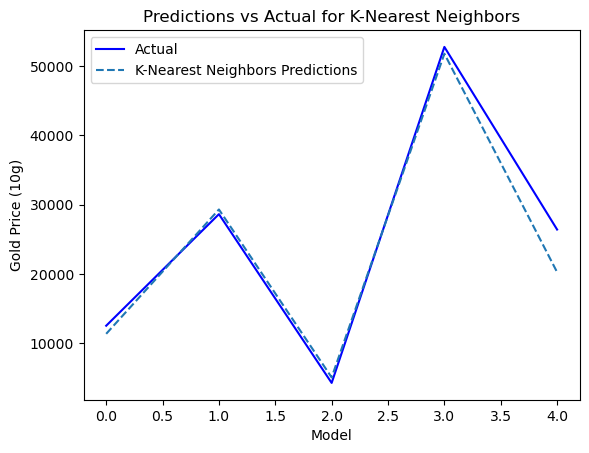

In [13]:
# Visualize Predictions for Each Model
plt.figure(figsize=(14, 10))
for name, y_pred in model_predictions.items():
    sns.lineplot(x=range(len(y_test)), y=y_test, label='Actual', color='blue')
    sns.lineplot(x=range(len(y_pred)), y=y_pred, label=f'{name} Predictions', linestyle='--')
    plt.title(f'Predictions vs Actual for {name}')
    plt.xlabel('Model')
    plt.ylabel('Gold Price (10g)')
    plt.legend()
    plt.show()


C:\Users\gadiy\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


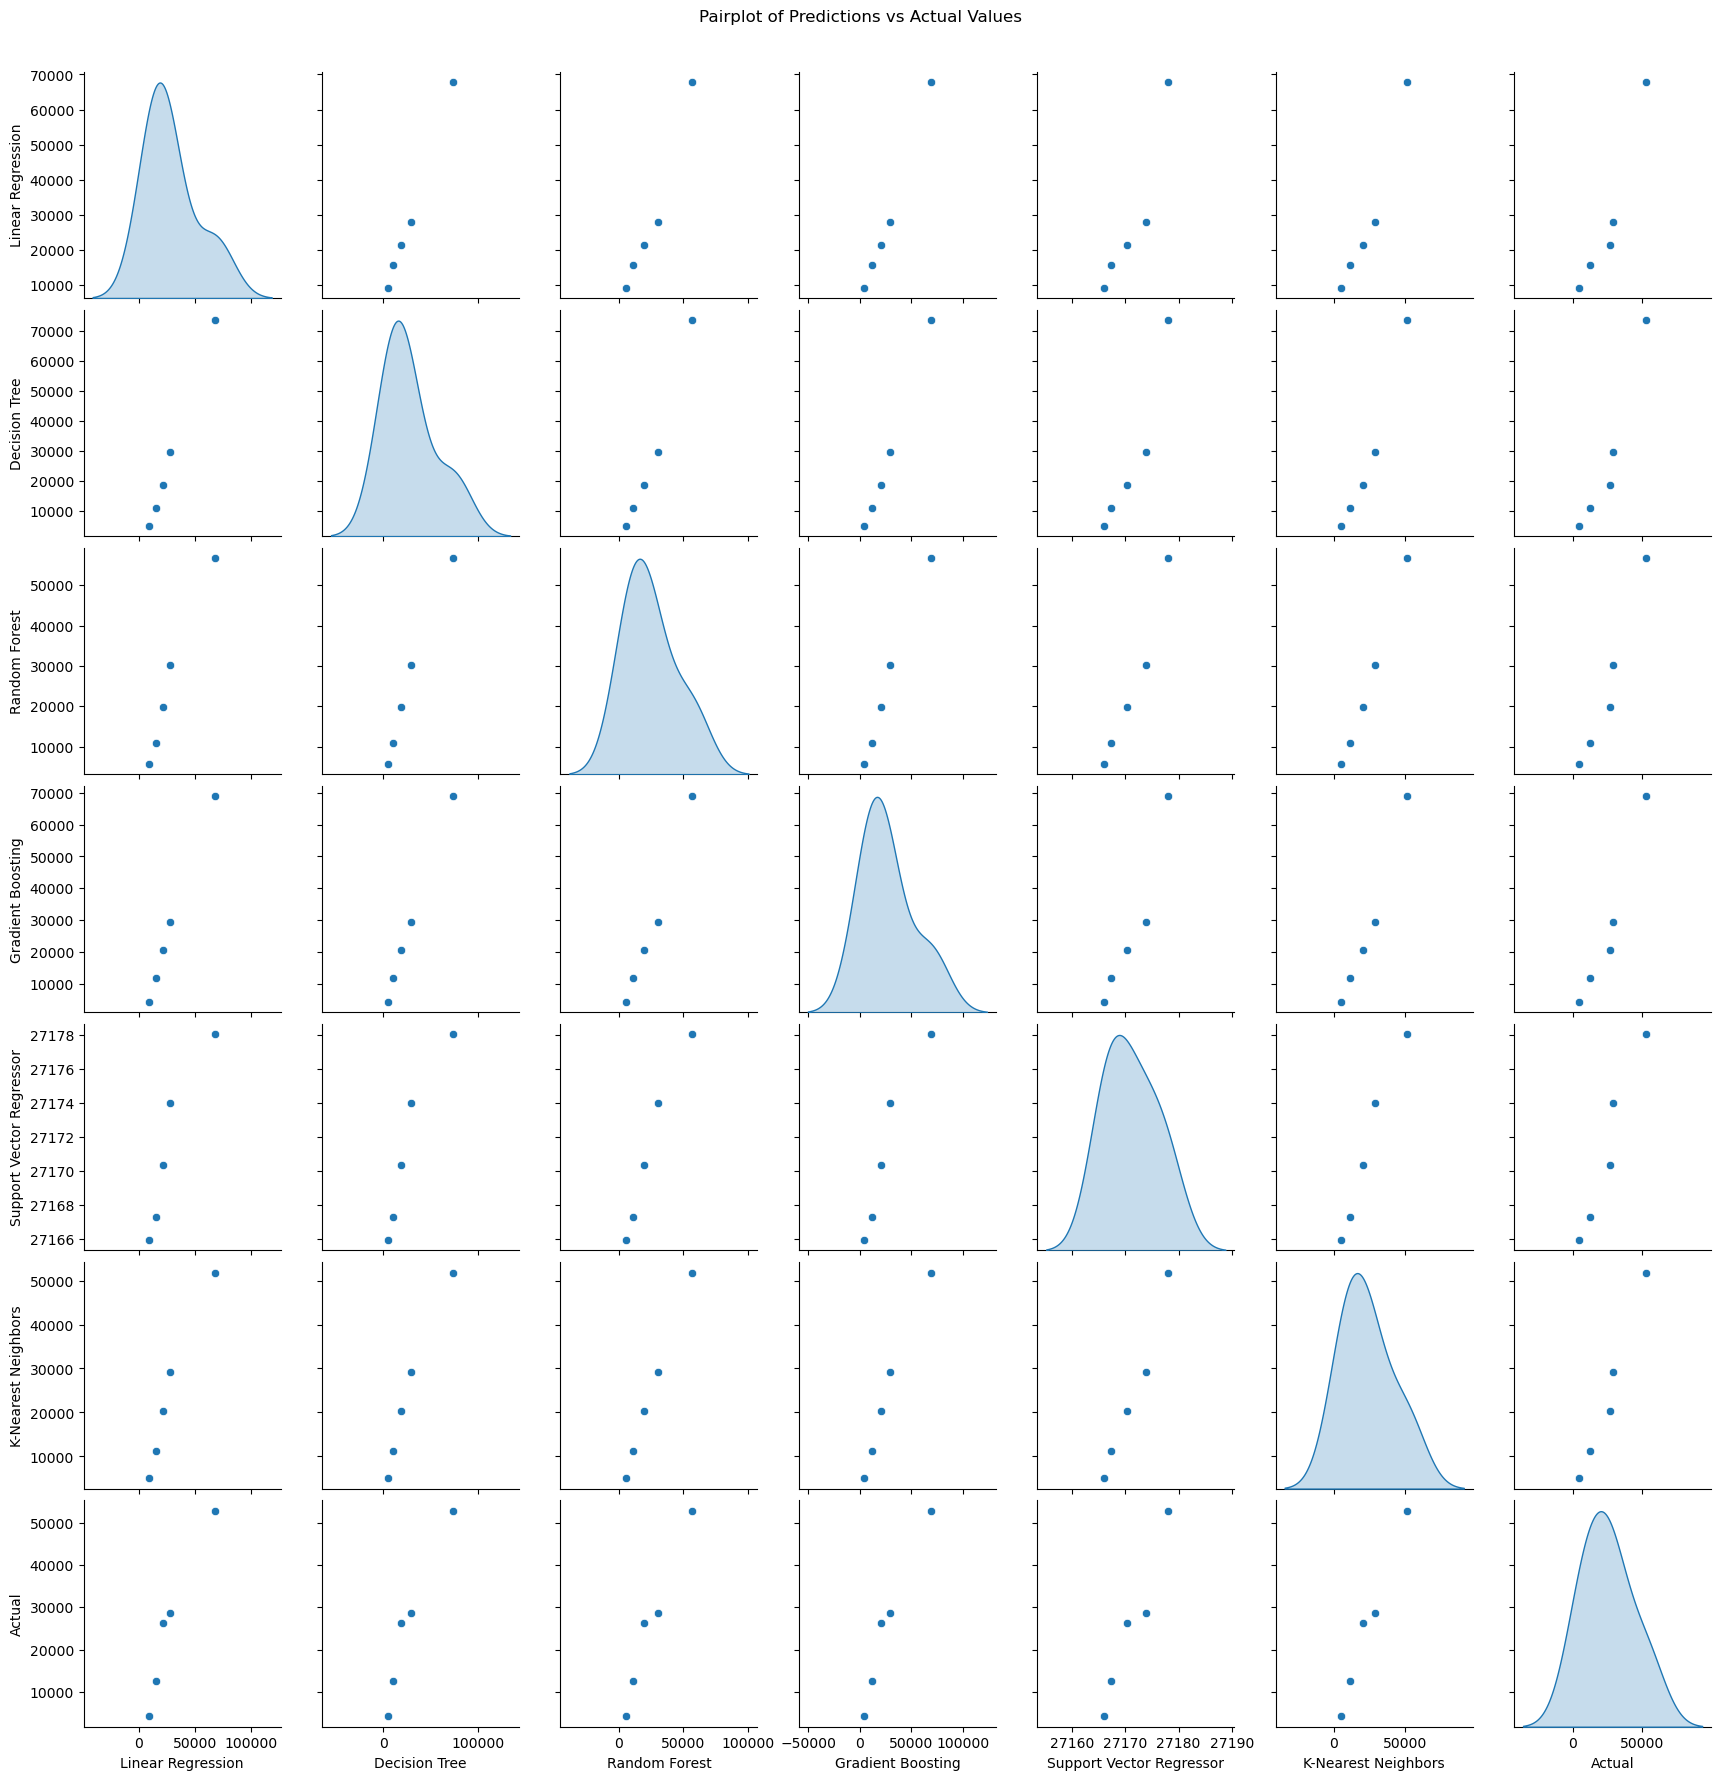

In [14]:
# Pairplot for Predicted vs Actual Values
predicted_df = pd.DataFrame(model_predictions)
predicted_df['Actual'] = y_test.values
sns.pairplot(predicted_df, diag_kind='kde')
plt.suptitle('Pairplot of Predictions vs Actual Values', y=1.02)
plt.show()

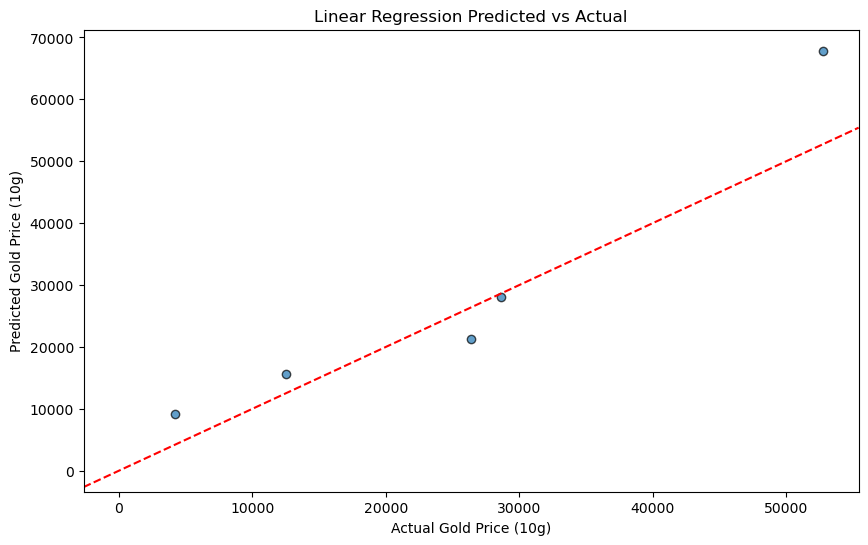

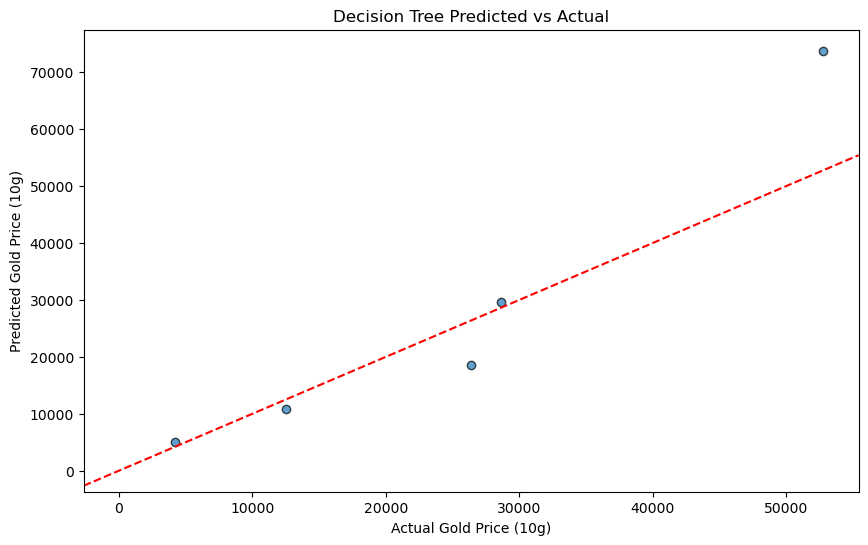

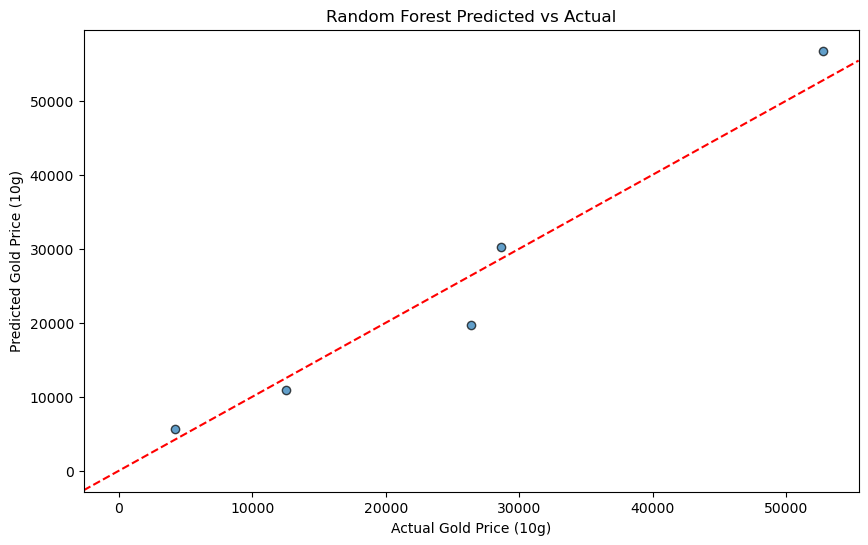

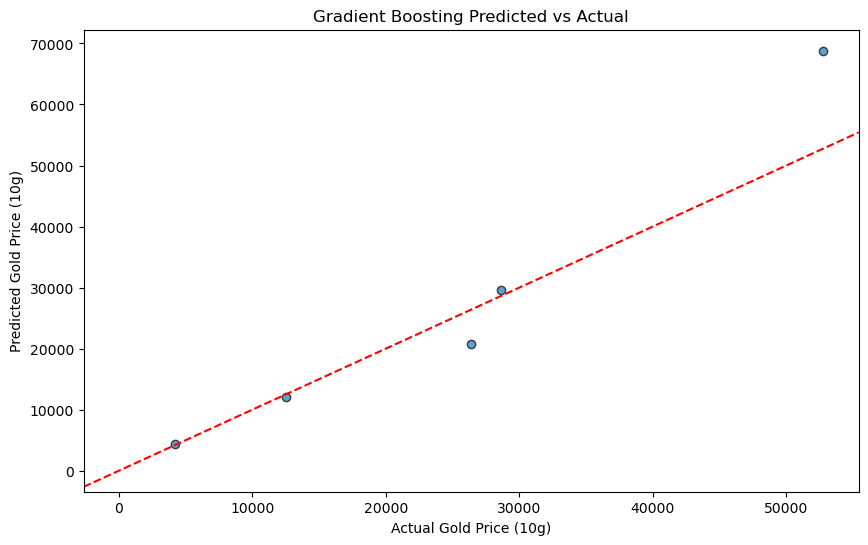

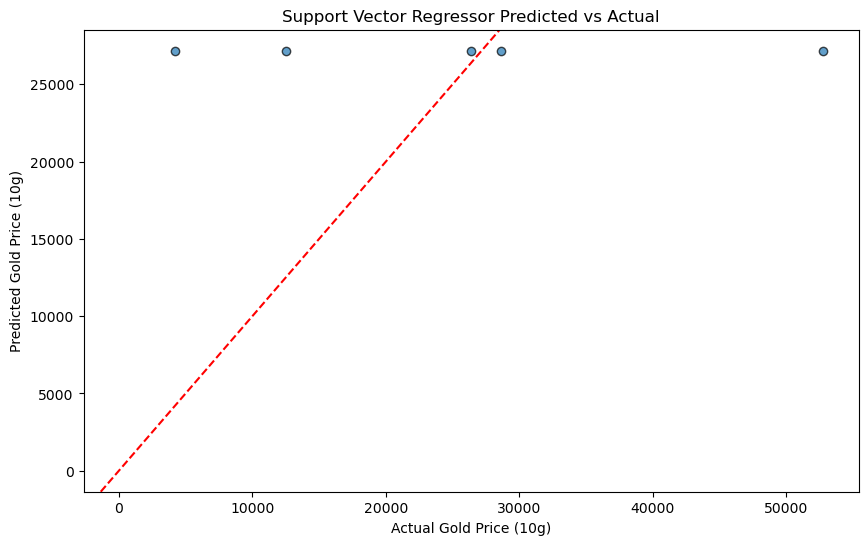

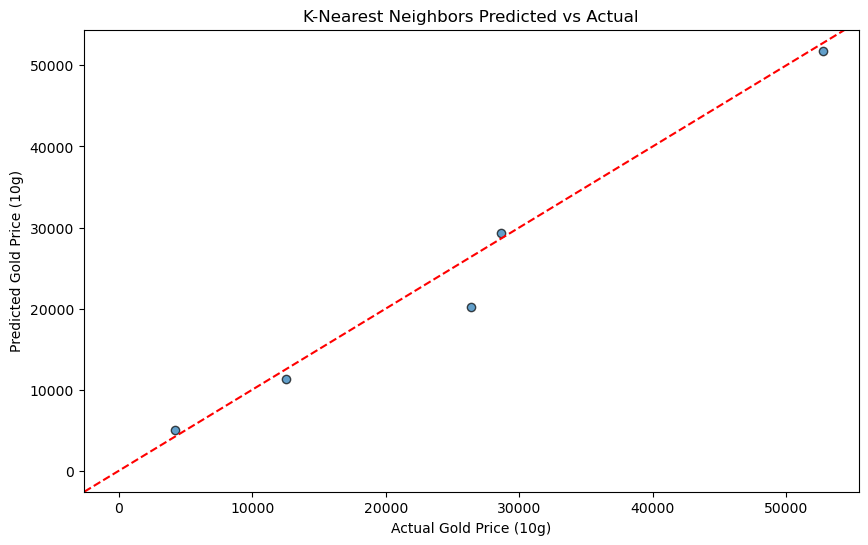

In [15]:
# Specific Visualization for Each Model
for name, model in models.items():
    plt.figure(figsize=(10, 6))
    y_pred = model_predictions[name]
    plt.scatter(y_test, y_pred, alpha=0.7, edgecolor='k')
    plt.title(f'{name} Predicted vs Actual')
    plt.xlabel('Actual Gold Price (10g)')
    plt.ylabel('Predicted Gold Price (10g)')
    plt.axline([0, 0], [1, 1], color='red', linestyle='--')
    plt.show()